In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds = xr.open_dataset('nc_temperaturas/tmean_anom.nc')
df_a = ds.to_dataframe().reset_index()
ds = xr.open_dataset('nc_temperaturas/tmin_anom.nc')
df_b = ds.to_dataframe().reset_index()
ds = xr.open_dataset('nc_temperaturas/tmax_anom.nc')
df_c = ds.to_dataframe().reset_index()

df_c['latitude'] = df_c['latitude'].round(2)
df_c['longitude'] = df_c['longitude'].round(2)
#criar uma coluna com o ano de cada data da coluna 'time'
df_c['ano'] = df_c['time'].dt.year

df_b['latitude'] = df_b['latitude'].round(2)
df_b['longitude'] = df_b['longitude'].round(2)
#criar uma coluna com o ano de cada data da coluna 'time'
df_b['ano'] = df_b['time'].dt.year

df_a['latitude'] = df_a['latitude'].round(2)
df_a['longitude'] = df_a['longitude'].round(2)
#criar uma coluna com o ano de cada data da coluna 'time'
df_a['ano'] = df_a['time'].dt.year

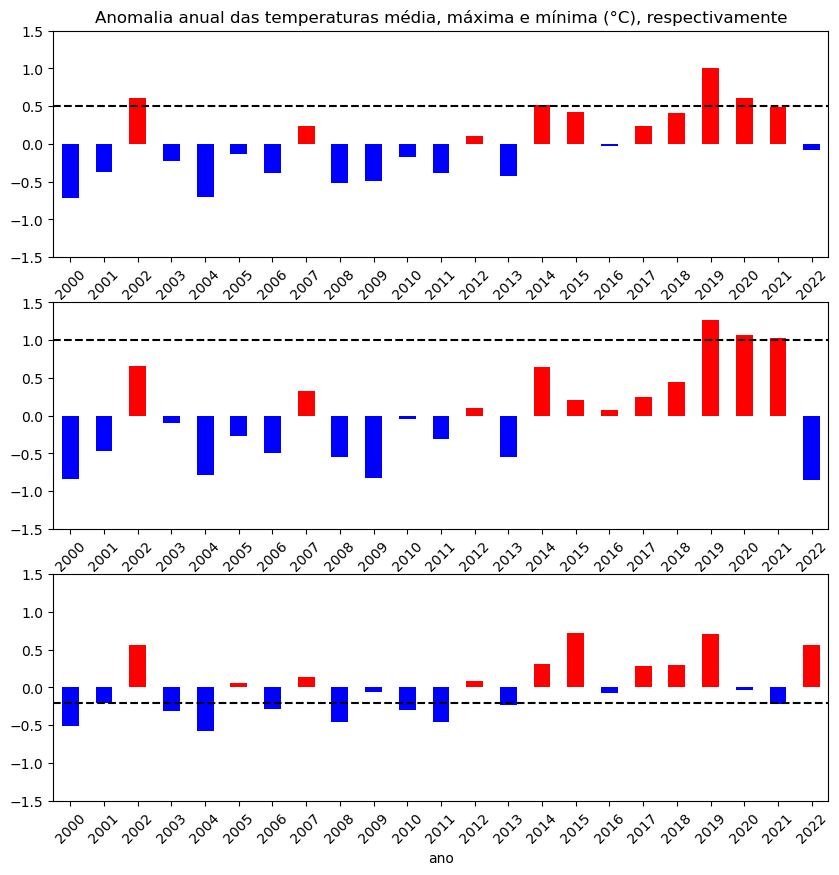

In [3]:
#criar 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,10))
#plotar no ax1 um grafico de barras agrupados por ano e com a media de tmean
df_a.groupby('ano')['tmean'].mean().plot(kind='bar',ax=ax1, ylim=(-1.5, 1.5), title='Anomalia anual das temperaturas média, máxima e mínima (°C), respectivamente', color=df_a.groupby('ano')['tmean'].mean().apply(lambda x: 'blue' if x < 0 else 'red'))
df_c.groupby('ano')['tmax'].mean().plot(kind='bar', ax=ax2, ylim=(-1.5, 1.5), color=df_c.groupby('ano')['tmax'].mean().apply(lambda x: 'blue' if x < 0 else 'red'))
df_b.groupby('ano')['tmin'].mean().plot(kind='bar', ax=ax3, ylim=(-1.5, 1.5), figsize=(10,10), color=df_b.groupby('ano')['tmin'].mean().apply(lambda x: 'blue' if x < 0 else 'red'))

#inclinar as labels do eixo x do ax1
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax3.get_xticklabels(), rotation=45)

#colocar uma linha tracejada no eixo y do ax1
ax1.axhline(y=0.5, color='k', linestyle='--')
ax2.axhline(y=1, color='k', linestyle='--')
ax3.axhline(y=-0.2, color='k', linestyle='--')
plt.savefig('t_anom_v2.png', dpi=300, bbox_inches='tight')
plt.show()

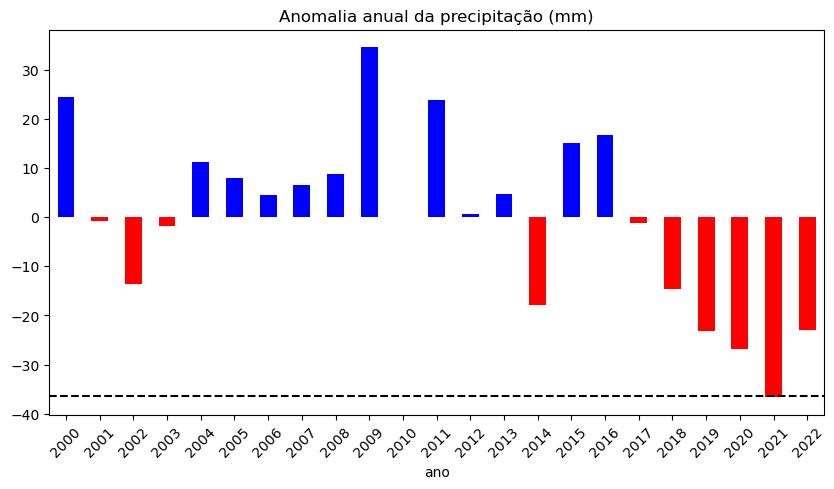

In [4]:
ds = xr.open_dataset('tp_anom.nc')
df = ds.to_dataframe().reset_index()
df['latitude'] = df['latitude'].round(2)
df['longitude'] = df['longitude'].round(2)

df['ano'] = df['time'].dt.year

fig, ax = plt.subplots(figsize=(10,5))
df.groupby('ano')['tp'].mean().plot(kind='bar', ax=ax, title='Anomalia anual da precipitação (mm)', color=df.groupby('ano')['tp'].mean().apply(lambda x: 'red' if x < 0 else 'blue'))
#inclinar as labels do eixo x
plt.setp(ax.get_xticklabels(), rotation=45)
#colocar uma linha tracejada no eixo y para destacar o valor que o ano de 2021 obteve
ax.axhline(y=-36.5, color='k', linestyle='--')
plt.savefig('tp_anom_v2.png', dpi=300, bbox_inches='tight')
plt.show()